### Classification and regression Trees

Classication and Regression Trees or CART for short is a term introduced by Leo Breiman
to refer to Decision Tree algorithms that can be used for classication or regression predictive
modeling problems.

The representation for the CART model is a binary tree. This is your binary tree from algorithms
and data structures, nothing too fancy. Each node represents a single input variable (x) and
a split point on that variable (assuming the variable is numeric). The leaf nodes of the tree contain an output variable (y) which is used to make a prediction.



Creating a binary decision tree is actually a process of dividing up the input space. A greedy
approach is used to divide the space called recursive binary splitting. This is a numerical
procedure where all the values are lined up and dierent split points are tried and tested using
a cost function. The split with the best cost (lowest cost because we minimize cost) is selected.

For regression predictive modeling problems
the cost function that is minimized to choose spit points is the sum squared error across all
training samples that fall within the rectangle. For classication the Gini cost function is used which provides an indication of how
pure the leaf nodes are (how mixed the training data assigned to each node is).

**A node that has all classes of the same type (perfect class purity)
will have G = 0, where as a G that has a 50-50 split of classes for a binary classication problem
(worst purity) will have a G = 0.5.**

17.2) 

The recursive binary splitting procedure described above needs to know when to stop splitting
as it works its way down the tree with the training data. The most common stopping procedure
is to use a minimum count on the number of training instances assigned to each leaf node. If
the count is less than some minimum then the split is not accepted and the node is taken as a
nal leaf node. The count of training members is tuned to the dataset, e.g. 5 or 10.
 
### Pruning the tree
 
 The stopping criterion is important as it strongly in
uences the performance of your tree. You
can use pruning after learning your tree to further lift performance. The complexity of a decision
tree is dened as the number of splits in the tree. Simpler trees are preferred. They are easy to
understand (you can print them out and show them to subject matter experts), and they are
less likely to overt your data.

### Preparing Data For CART

CART does not require any special data preparation other than a good representation of the
problem.

In this chapter you will discover how to implement
the CART machine learning algorithm from scratch step-by-step. After completing this chapter
you will know:

- How to calculate the Gini index for a given split in a decision tree.
- How to evaluate dierent split points when constructing a decision tree.
- How to make predictions on new data with a learned decision tree.

### Tutorial Dataset

In this tutorial we will work through a simple binary (two-class) classication problem for
CART. To keep things simple we will work with a two input variables (X1 and X2) and a single
output variable (Y ). This is not a real problem but a contrived problem to demonstrate how
to implement the CART model and make predictions. The example was designed so that the
algorithm will find at least two split points in order to best classify the training dataset. The
raw data for this problem is as follows:


In [111]:
from io import StringIO
import pandas as pd
import numpy as np

In [112]:
dataset = StringIO("""X1 X2 Y
2.771244718 1.784783929 0
1.728571309 1.169761413 0
3.678319846 2.81281357 0
3.961043357 2.61995032 0
2.999208922 2.209014212 0
7.497545867 3.162953546 1
9.00220326 3.339047188 1
7.444542326 0.476683375 1
10.12493903 3.234550982 1
6.642287351 3.319983761 1
""")

In [113]:
dataset = pd.read_csv(dataset, sep=" ")
dataset

,X1,X2,Y
0,2.771245,1.784784,0
1,1.728571,1.169761,0
2,3.678320,2.812814,0
3,3.961043,2.619950,0
4,2.999209,2.209014,0
5,7.497546,3.162954,1
6,9.002203,3.339047,1
7,7.444542,0.476683,1
8,10.124939,3.234551,1
9,6.642287,3.319984,1


### Learning the CART Model

The CART model is learned by looking for split points in the data. A split point is a single
value of a single attribute, e.g. the rst value of the X1 attribute 2.771244718. Partitioning
data at a split point involves separating all data at that node into two groups, left of the split
point and right of the split point. If we are working on the rst split point in the tree, then all
of the dataset is aected. If we are working on say a split point one level deep, then only the
data that has ltered down the tree from nodes above and is sitting at that node is aected by
the split point.

We are not concerned with what the class value is of the chosen split point. We only care
about the composition of the data assigned to the LEFT and to the RIGHT child nodes of the
split point. A cost function is used to evaluate the mix of classes of training data assigned to
each side of the split. In classication problems the Gini index cost function is used.

**For each class (k), for each group (left and right). Where p is the proportion of training
instances with a given class in a given group. We will always have two groups, a left and right
group because we are using a binary tree**. And we know from our dataset that we only have
two classes. Therefore we can calculate the Gini index of any split point in our dataset as the
sum of:

Gini(split) = (left(0) x (1 - left(0))) + (right(0) x (1 - right(0))+
(left(1) X (1 - left(1))) + (right(1) x (1 - right(1))

In [114]:
gini = StringIO("""X1 Y Group
2.771244718 0 RIGHT
1.728571309 0 LEFT
3.678319846 0 RIGHT
3.961043357 0 RIGHT
2.999208922 0 RIGHT
7.497545867 1 RIGHT
9.00220326 1 RIGHT
7.444542326 1 RIGHT
10.12493903 1 RIGHT
6.642287351 1 RIGHT
""")
df_gini = pd.read_csv(gini, sep=" ")
df_gini


,X1,Y,Group
0,2.771245,0,RIGHT
1,1.728571,0,LEFT
2,3.678320,0,RIGHT
3,3.961043,0,RIGHT
4,2.999209,0,RIGHT
5,7.497546,1,RIGHT
6,9.002203,1,RIGHT
7,7.444542,1,RIGHT
8,10.124939,1,RIGHT
9,6.642287,1,RIGHT


### First Candidate Split Point

The fist step is to choose a split that will become the stump or root node of our decision tree.
We will start with the first candidate split point which is the X1 attribute and the value of X1
in the first instance: X1 = 2:771244718.

- IF X1 < 2.771244718 THEN LEFT
- IF X1 >= 2.771244718 THEN RIGHT

How good was this split? We can evaluate the mixture of the classes in each of the LEFT
and RIGHT nodes as a single cost of choosing this split point for our root node. The LEFT
group only has one member, where as the RIGHT group has 9 members. Starting with the
LEFT group, we can calculate the proportion of training instances that have each class:

In [115]:
# set the conditions to calculate the proportions of which group
zeros = df_gini.Y.eq(0)
ones = df_gini.Y.eq(1)
left = df_gini.Group.eq('LEFT')
right = df_gini.Group.eq('RIGHT')

In [116]:
# starting with the left group
total_left = left.sum()
left_0 = np.sum(left & zeros) / total_left
left_1 = np.sum(left & ones) / total_left
left_0, left_1

(1.0, 0.0)

In [117]:
# now with the right group 
total_right = right.sum()
right_0 = np.sum(right & zeros) / total_right
right_1 = np.sum(right & ones) / total_right
right_0, right_1

(0.4444444444444444, 0.5555555555555556)

We have now enough information to calculate the gini index for this split. Remembering the below:

Gini(split) = (left(0) x (1 - left(0))) + (right(0) x (1 - right(0))+
(left(1) X (1 - left(1))) + (right(1) x (1 - right(1))

In [118]:
# X1 = 2.7712, as a bad gini index
gini = left_0 * (1 - left_0) + right_0 * (1- right_0) + (left_1* (1- left_1)) + (right_1 * (1- right_1))
gini

0.49382716049382713

Creating a function to resolve the gini score for this dataset based on any split point for X1

In [119]:
from typing import Tuple

def _class_proportions(df, group:str) -> Tuple[float, float]:
    """Based on the requested group provided returns the class proportions
    left and right"""
    
    # set the conditions to calculate the proportions of which group
    zeros = df.Y.eq(0)
    ones = df.Y.eq(1)
    group = df.group.eq(group)
    
    # now for the group
    total_group = group.sum()
    group_0 = np.sum(group & zeros) / total_group
    group_1 = np.sum(group & ones) / total_group
    
    return group_0, group_1
    
def gini_score(df, split:float)-> float:
    """Calculates gini score for dataset 
    with one feature X1 based on split point provided"""
    df_gini = df.copy()
    # define LEFT and RIGHT groups
    df_gini.loc[df_gini['X1'] < split, 'group'] = 'LEFT'
    df_gini.loc[df_gini['X1'] >= split, 'group'] = 'RIGHT'
    
    # calculate class proportions for each group
    left_0, left_1 = _class_proportions(df_gini, "LEFT")
    right_0, right_1 = _class_proportions(df_gini, "RIGHT")
    
    return left_0 * (1 - left_0) + right_0 * (1- right_0) + (left_1* (1- left_1)) + (right_1 * (1- right_1))


In [120]:
dataset

,X1,X2,Y
0,2.771245,1.784784,0
1,1.728571,1.169761,0
2,3.678320,2.812814,0
3,3.961043,2.619950,0
4,2.999209,2.209014,0
5,7.497546,3.162954,1
6,9.002203,3.339047,1
7,7.444542,0.476683,1
8,10.124939,3.234551,1
9,6.642287,3.319984,1


In [121]:
# same score 0.49382716049382713
split = 2.771244718
assert 0.49 < gini_score(dataset, split) < 0.50

#### Best Candidate Split Point

We can evaluate each candidate split point using the process above with the values from X1
and X2. If we look at the graph of the data, we can see that we can probably draw a vertical
line to separate the classes. This would translate to a split point for X1 with a value around
0.5. A close fit would be the value for X1 in the last instance: X1 = 6.642287351.


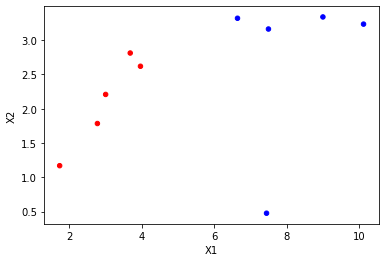

In [125]:
%matplotlib inline
import matplotlib.pyplot as plt

colors = {0:'red', 1:'blue'}
dataset.plot(x = 'X1', y='X2', c= dataset.Y.map(colors), kind= 'scatter');

In [140]:
# perfect split
split = 6.642287351
assert gini_score(dataset, split) == 0

In [141]:
def cart_classifier(series, split:float):
    """based on split point returns a series of predictions"""
    return pd.Series(series >= split).astype(int)

In [142]:
dataset['predictions'] = cart_classifier(dataset['X1'], split)

In [139]:
dataset

,X1,X2,Y,predictions
0,2.771245,1.784784,0,0
1,1.728571,1.169761,0,0
2,3.678320,2.812814,0,0
3,3.961043,2.619950,0,0
4,2.999209,2.209014,0,0
5,7.497546,3.162954,1,1
6,9.002203,3.339047,1,1
7,7.444542,0.476683,1,1
8,10.124939,3.234551,1,1
9,6.642287,3.319984,1,1
